In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

In [0]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f95de0e57b8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f95de1da748>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f95de1da7f0>)

In [0]:
mnist.train.images.shape

(55000, 784)

In [0]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [0]:
import numpy as np 
from matplotlib import pyplot as plt 

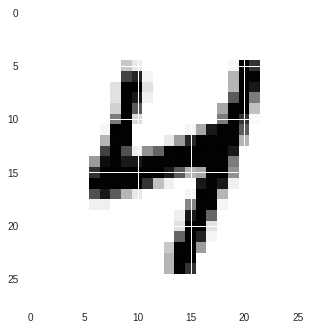

In [0]:
first_image = mnist.train.images[111]
first_image = np.array(first_image,dtype = "float")
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [0]:
n_input = 784
n_hidden_1 = 400 
n_hidden_2 = 400
n_classes = 10 

weights = {
    'h1' : tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

biases = {
    
    'h1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_classes]))
}



In [0]:
def forward_propagation(x,weights,biases):
  in_layer_1= tf.add(tf.matmul(x,weights['h1']),biases['h1']) 
  output_layer1 = tf.nn.relu(in_layer_1)
  
  in_layer_2 = tf.add(tf.matmul(output_layer1,weights['h2']),biases['h2'])
  output_layer2 = tf.nn.relu(in_layer_2)
  
  output = tf.add(tf.matmul(output_layer2 , weights['out']),biases['out'])
  return output


In [0]:
x = tf.placeholder("float",[None , n_input])
y = tf.placeholder(tf.int32 , [None,n_classes])
pred = forward_propagation(x,weights,biases)

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y))

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
optimize = optimizer.minimize(cost)

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())


In [0]:
for i in range(25):
  c,_ = sess.run([cost,optimize] , feed_dict = {x:mnist.train.images, y:mnist.train.labels})
  print(c)

211.04794
180.05753
165.69582
162.0648
161.35065
158.16391
151.01732
141.45152
124.09428
117.61445
112.10169
107.05653
102.33114
98.057365
94.26973
91.03273
88.21067
85.5958
82.90012
79.994484
76.92033
73.883865
71.02725
68.51309


In [0]:
pred = forward_propagation(x,weights,biases)
predictions = tf.argmax(pred,1)
true_labels = tf.argmax(y,1)
correct_predictions = tf.equal(predictions,true_labels)

In [0]:
predictions_eval,labels,correct_pred = sess.run([predictions, true_labels,correct_predictions] , feed_dict = {x:mnist.test.images , y:mnist.test.labels})
predictions_eval ,labels

(array([7, 2, 1, ..., 4, 5, 6]), array([7, 2, 1, ..., 4, 5, 6]))

In [0]:
correct_pred.sum()

9021

Using TensorFlow backend.
